###  PersistAD

`PersistAD` compares each time series value with its previous values. Internally, it is implemented as a [pipenet](#Pipenet) with transformer [DoubleRollingAggregate](#DoubleRollingAggregate).


In the following example, we detect anomalous positive changes of price.

In [10]:
s = pd.read_csv('../docs/notebooks/data/price_short.csv', index_col="Time", parse_dates=True, squeeze=True)
s = validate_series(s)

C:\Users\ms28175\AppData\Local\Temp\ipykernel_3664\2482282965.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('../docs/notebooks/data/price_short.csv', index_col="Time", parse_dates=True, squeeze=True)


In [ ]:
from src.adtk.detector import PersistAD
from src.adtk.visualization import plot
persist_ad = PersistAD(c=3.0, side='both')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

## 1

In [25]:
import json
import pandas as  pd
json_path = "D:/company/project/anomaly_detection_point/spike_detect/self_test/data/生成的数据/both/both1.1.json"
with open(json_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
# print(data)
s = data['series']['s1']  # list
# print(s)
timestamp_list  = pd.date_range(start='2024-06-01', periods=len(s), freq='D')
s = pd.DataFrame(data=s, index=timestamp_list, columns=['Value'])
# print(s)

actual_index = data['actual_index']['s1'] 

actual_index 
 [76, 87, 128, 151, 290, 305, 306, 397, 428, 539, 784, 824, 873, 882, 932, 951, 1230, 1236, 1726, 1728, 1767, 1912, 1947, 1981, 1984]
pred_index 
 [76, 87, 128, 152, 290, 305, 398, 429, 785, 824, 874, 883, 933, 952, 1230, 1237, 1727, 1728, 1831, 1947, 1984]


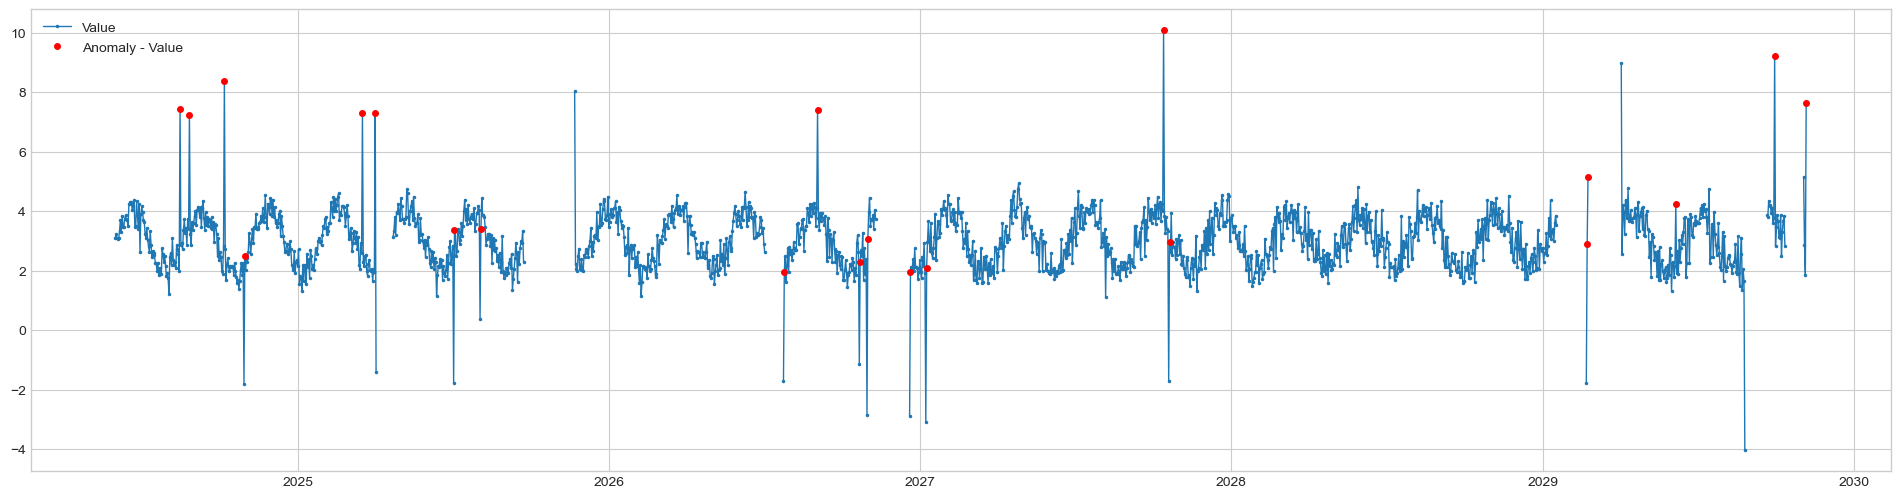

In [29]:
from src.adtk.detector import PersistAD
from src.adtk.visualization import plot
# import matplotlib.pyplot as plt
persist_ad = PersistAD(c=3.0, side='positive', min_periods = 1, window=1)
anomalies = persist_ad.fit_detect(s)
# plt.plot(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_tag="marker", anomaly_color='red', figsize=(24,6));
pred_index = anomalies.reset_index().index[anomalies['Value'] == True].tolist()
print("actual_index", "\n", actual_index)
print("pred_index", "\n", pred_index)

## 2

In [37]:
import pandas as pd
from src.adtk.data import validate_series
s = pd.read_csv('../docs/notebooks/data/price_short_modified.csv', index_col="Time", parse_dates=True, squeeze=True)
s = validate_series(s)

C:\Users\98745\AppData\Local\Temp\ipykernel_1280\3976204003.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('../docs/notebooks/data/price_short_modified.csv', index_col="Time", parse_dates=True, squeeze=True)


[0, 1, 6, 40, 41, 42, 43, 44, 63, 64, 65, 66, 67, 68, 69, 106, 121, 122, 123, 124, 125, 131, 133, 157, 165, 166, 167, 168, 169]


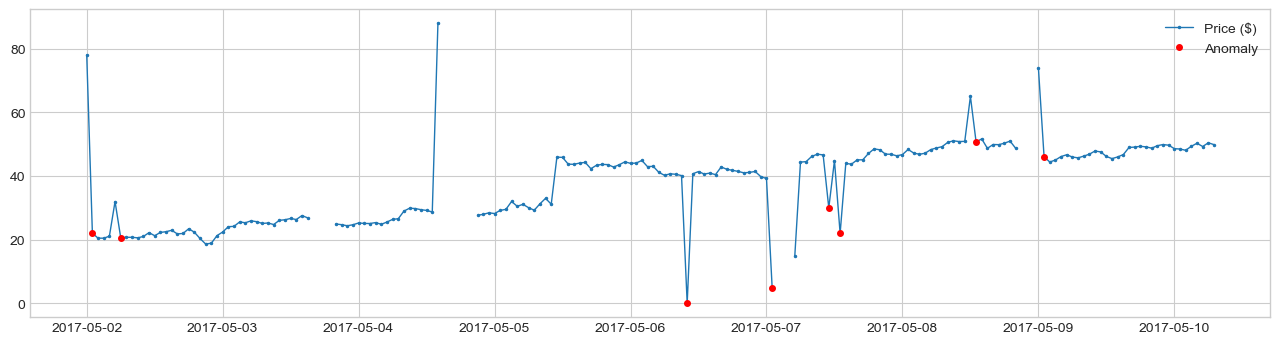

In [46]:
from src.adtk.detector import PersistAD
from src.adtk.visualization import plot
persist_ad = PersistAD(c=3.0, side='negative', min_periods = 1, window=1)
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_tag="marker")
pred_index = [i for i, v in enumerate(anomalies) if v]
print(pred_index)

## 3.1

In [59]:
def rolling_aggregate_list(data, window, agg='mean', center=False, min_periods=None):
    result = []
    length = len(data)
    if min_periods is None:
        min_periods = window

    def get_window_slice(center_index):
        if center:
            start = max(center_index - window // 2, 0)
            end = min(center_index + window // 2 + 1, length)
        else:
            start = max(center_index - window + 1, 0)
            end = center_index + 1
        return data[start:end]

    for i in range(length):
        window_slice = get_window_slice(i)
        print(window_slice)
        valid_values = [x for x in window_slice if x is not None]
        print(valid_values)
        if len(valid_values) >= min_periods:
            if agg == 'mean':
                result.append(sum(valid_values) / len(valid_values))
            elif agg == 'sum':
                result.append(sum(valid_values))
            elif agg == 'min':
                result.append(min(valid_values))
            elif agg == 'max':
                result.append(max(valid_values))
            else:
                raise ValueError(f"Unsupported aggregation function: {agg}")
        else:
            result.append(None)

    return result

In [60]:
def rolling_aggregate(s, window, agg='mean', center=False, min_periods=None):
    data = s.tolist()
    if isinstance(window, str):
        window = pd.Timedelta(window).days  # Assuming daily frequency for simplicity
    result = rolling_aggregate_list(data, window, agg, center, min_periods)
    return pd.Series(result, index=s.index)

In [61]:
import pandas as pd
from src.adtk.transformer import RollingAggregate

def test_rolling_aggregate():
    # 生成时间序列数据
    dates = pd.date_range('2020-01-01', periods=15)
    data = pd.Series(range(15), index=dates)
    
    # 插入空值（NaN）
    data.iloc[3] = None
    data.iloc[7] = None
    data.iloc[8] = 15
    print(data)
    
    window = 3
    min_periods = 1
    aggs = ['mean', 'sum', 'min', 'max']

    for agg in aggs:
        rolling_agg_class = RollingAggregate(window=window, agg=agg, min_periods=min_periods)
        result_class = rolling_agg_class.transform(data)
        print(agg)
        print(result_class)


        result_function = rolling_aggregate(data, window=window, agg=agg, min_periods=min_periods)
        print(result_function)
        assert result_class.equals(result_function), f"Results do not match for agg method: {agg}"

    print("All tests passed!")

test_rolling_aggregate()


2020-01-01     0.0
2020-01-02     1.0
2020-01-03     2.0
2020-01-04     NaN
2020-01-05     4.0
2020-01-06     5.0
2020-01-07     6.0
2020-01-08    15.0
2020-01-09     8.0
2020-01-10     9.0
2020-01-11    10.0
2020-01-12    11.0
2020-01-13    12.0
2020-01-14    13.0
2020-01-15    14.0
Freq: D, dtype: float64
mean
2020-01-01     0.000000
2020-01-02     0.500000
2020-01-03     1.000000
2020-01-04     1.500000
2020-01-05     3.000000
2020-01-06     4.500000
2020-01-07     5.000000
2020-01-08     8.666667
2020-01-09     9.666667
2020-01-10    10.666667
2020-01-11     9.000000
2020-01-12    10.000000
2020-01-13    11.000000
2020-01-14    12.000000
2020-01-15    13.000000
Freq: D, dtype: float64
[0.0]
[0.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0, 2.0]
[0.0, 1.0, 2.0]
[1.0, 2.0, nan]
[1.0, 2.0, nan]
[2.0, nan, 4.0]
[2.0, nan, 4.0]
[nan, 4.0, 5.0]
[nan, 4.0, 5.0]
[4.0, 5.0, 6.0]
[4.0, 5.0, 6.0]
[5.0, 6.0, 15.0]
[5.0, 6.0, 15.0]
[6.0, 15.0, 8.0]
[6.0, 15.0, 8.0]
[15.0, 8.0, 9.0]
[15.0, 8.0, 9.0]
[8.0, 

AssertionError: Results do not match for agg method: mean

## 3.2

In [4]:
from typing import Union, Optional, Tuple, Dict, Any, Callable
import pandas as pd

def double_rolling_aggregate_list(
    data: Union[list, pd.Series],
    window: Union[int, str, Tuple[Union[int, str], Union[int, str]]],
    agg: Union[
        str, Callable[[pd.Series], Union[float, list]],
        Tuple[
            Union[str, Callable[[pd.Series], Union[float, list]]],
            Union[str, Callable[[pd.Series], Union[float, list]]],
        ],
    ] = "mean",
    agg_params: Union[
        Optional[Dict[str, Any]],
        Tuple[Optional[Dict[str, Any]], Optional[Dict[str, Any]]],
    ] = None,
    center: bool = True,
    min_periods: Union[
        Optional[int], Tuple[Optional[int], Optional[int]]
    ] = None,
    diff: Union[
        str,
        Callable[
            [Union[float, list], Union[float, list]], Union[float, list]
        ],
    ] = "l1"
) -> Union[list, pd.Series]:
    """Perform double rolling aggregation using lists or pandas Series input."""
    
    # Convert input data to list if it's a Series
    if isinstance(data, pd.Series):
        data = data.tolist()

    # Use rolling_aggregate_list function to compute the result
    result = rolling_aggregate_list(data, window, agg, center, min_periods)

    # Apply additional logic similar to DoubleRollingAggregate
    if isinstance(window, tuple) and len(window) == 2:
        window_left, window_right = window
        if isinstance(result, list):
            result_left = rolling_aggregate_list(result, window_left, agg[0], center, min_periods)
            result_right = rolling_aggregate_list(result, window_right, agg[1], center, min_periods)
        else:  # Assuming result is a pd.Series
            result_left = rolling_aggregate_list(result.tolist(), window_left, agg[0], center, min_periods)
            result_right = rolling_aggregate_list(result.tolist(), window_right, agg[1], center, min_periods)

        if isinstance(diff, str):
            if diff == 'diff':
                result = [r - l for l, r in zip(result_left, result_right)]
            elif diff == 'rel_diff':
                result = [(r - l) / l if l != 0 else 0.0 for l, r in zip(result_left, result_right)]
            elif diff == 'abs_rel_diff':
                result = [abs(r - l) / l if l != 0 else 0.0 for l, r in zip(result_left, result_right)]
            elif diff == 'l1':
                result = [abs(r - l) for l, r in zip(result_left, result_right)]
            elif diff == 'l2':
                result = [(r - l) ** 2 for l, r in zip(result_left, result_right)]
        elif callable(diff):
            result = [diff(l, r) for l, r in zip(result_left, result_right)]
        else:
            raise ValueError("Invalid value of diff")

    # Convert result back to Series if input was a Series
    if isinstance(data, pd.Series):
        result = pd.Series(result, index=data.index)

    return result


In [5]:
def trans(
    s: Union[pd.Series, list],
    window: Union[int, str, Tuple[Union[int, str], Union[int, str]]],
    agg: Union[
        str, Callable[[pd.Series], Union[float, list]],
        Tuple[
            Union[str, Callable[[pd.Series], Union[float, list]]],
            Union[str, Callable[[pd.Series], Union[float, list]]],
        ],
    ] = "mean",
    center: bool = True,
    min_periods: Union[
        Optional[int], Tuple[Optional[int], Optional[int]]
    ] = None,
    diff: Union[
        str,
        Callable[
            [Union[float, list], Union[float, list]], Union[float, list]
        ],
    ] = "l1"
) -> Union[pd.Series, list]:
    """Transform data between different formats for rolling aggregation."""
    if isinstance(s, list):
        return double_rolling_aggregate_list(s, window, agg, center, min_periods, diff)
    elif isinstance(s, pd.Series):
        return double_rolling_aggregate_list(s, window, agg, center, min_periods, diff)
    else:
        raise ValueError("Unsupported input type. Must be list or pd.Series.")


In [6]:
import pandas as pd
from src.adtk.transformer import DoubleRollingAggregate

def test_double_rolling_aggregate_list():
    dates = pd.date_range('2020-01-01', periods=10)
    data = pd.Series(range(10), index=dates)
    window = 3
    aggs = ['mean', 'sum', 'min', 'max']

    for agg in aggs:
        double_rolling_agg_class = DoubleRollingAggregate(window=window, agg=agg)
        result_class = double_rolling_agg_class.transform(data)

        result_function = double_rolling_aggregate_list(data, window=window, agg=agg)
        assert result_class.equals(result_function), f"Results do not match for agg method: {agg}"

    print("All tests passed!")

test_double_rolling_aggregate_list()


AssertionError: Results do not match for agg method: mean

## 3.3

In [1]:
import numpy as np

class RollingAggregate_:
    def __init__(self, window, agg='mean', min_periods=None):
        self.window = window
        self.agg = agg
        self.min_periods = min_periods

    def _rolling_mean(self, data):
        result = np.zeros(len(data) - self.window + 1)
        for i in range(len(result)):
            result[i] = np.mean(data[i:i+self.window])
        return result

    def _rolling_median(self, data):
        result = np.zeros(len(data) - self.window + 1)
        for i in range(len(result)):
            result[i] = np.median(data[i:i+self.window])
        return result

    def transform(self, data):
        if self.agg == 'mean':
            return self._rolling_mean(data)
        elif self.agg == 'median':
            return self._rolling_median(data)
        # Add more conditions for other aggregation functions

def roll(window, agg, min_periods, data):
    rolling_agg_class = RollingAggregate_(window=window, agg=agg, min_periods=min_periods)
    result_class = rolling_agg_class.transform(data)
    return result_class


In [3]:
# 测试数据
data = np.array([1, 2, 3, np.nan, 5, 6, 7, 8, 9, 10])
window = 3
agg = 'mean'
min_periods = None

# 使用重新编写的 roll 函数进行计算
result_roll = roll(window, agg, min_periods, data)
print("使用重新编写的 roll 函数计算结果：", result_roll)


from src.adtk.transformer import RollingAggregate
# 使用原始的 RollingAggregate 类进行计算
rolling_agg_class = RollingAggregate(window=window, agg=agg, min_periods=min_periods)
result_class = rolling_agg_class.transform(data)
print("使用原始 RollingAggregate 类计算结果：", result_class)

# 比较两者的结果是否一致
assert np.array_equal(result_roll, result_class), "结果不一致"
print("两种方法计算结果一致！")


使用重新编写的 roll 函数计算结果： [ 2. nan nan nan  6.  7.  8.  9.]


TypeError: Input must be a pandas Series or DataFrame.

In [ ]:
# ============================== 修改测试部分2 ==============================

By default, `PersistAD` only check one previous value, which is good at capturing additive anomaly in short-term scale, but not in long-term scale because it is too near-sighted. 

In the following example, it fails to capture meaningful drops of price in a longer time scale.

In [12]:
s = pd.read_csv('../docs/notebooks/data/price_long.csv', index_col="Time", parse_dates=True, squeeze=True)
s = validate_series(s)

C:\Users\ms28175\AppData\Local\Temp\ipykernel_23076\847039227.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('../docs/notebooks/data/price_long.csv', index_col="Time", parse_dates=True, squeeze=True)


D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


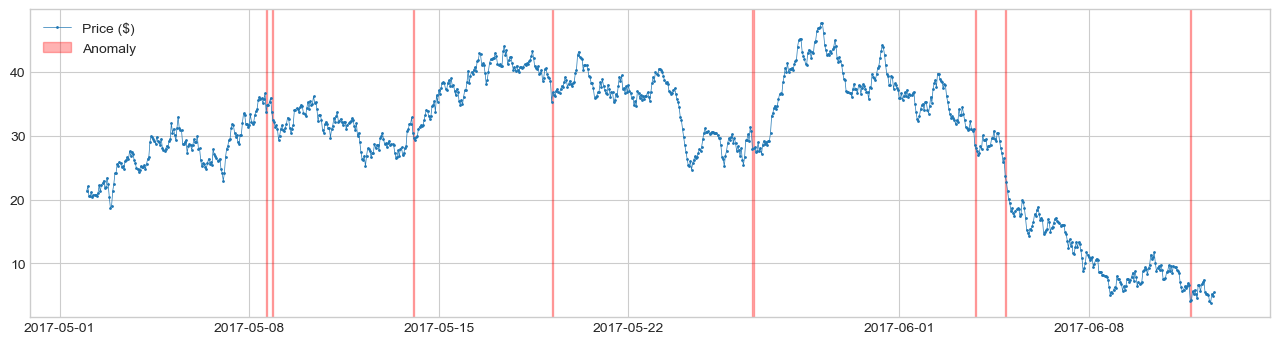

In [13]:
persist_ad = PersistAD(c=1.5, side='negative')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

We may change the parameter `window` to a number greater than 1, and the detector will compare a value to the median or mean of its preceding time window. This will capture anomalous changes in mid- to long-term scale, because it is less near-sighted. In the same example as above, it detects drops of price in the long-term scale successfully.

In [14]:
persist_ad.window = 24
anomalies = persist_ad.fit_detect(s)

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


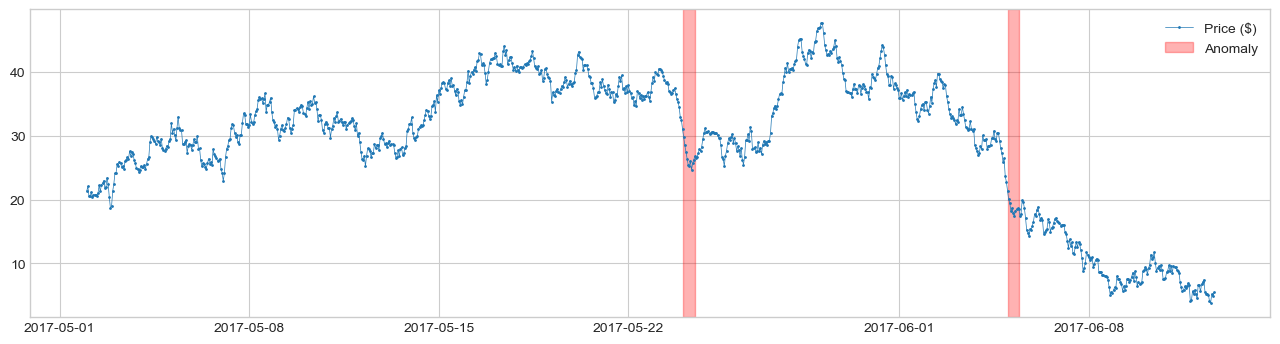

In [15]:
plot(s, anomaly=anomalies, anomaly_color='red');